<a href="https://colab.research.google.com/github/Tejasri-Pendota/FMML_Projects_and_Labs/blob/main/M4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [4]:
def f(x):
    return x ** 2 + x + 1

In [5]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)
x_1

array([-3.        , -2.98797595, -2.9759519 , -2.96392786, -2.95190381,
       -2.93987976, -2.92785571, -2.91583166, -2.90380762, -2.89178357,
       -2.87975952, -2.86773547, -2.85571142, -2.84368737, -2.83166333,
       -2.81963928, -2.80761523, -2.79559118, -2.78356713, -2.77154309,
       -2.75951904, -2.74749499, -2.73547094, -2.72344689, -2.71142285,
       -2.6993988 , -2.68737475, -2.6753507 , -2.66332665, -2.65130261,
       -2.63927856, -2.62725451, -2.61523046, -2.60320641, -2.59118236,
       -2.57915832, -2.56713427, -2.55511022, -2.54308617, -2.53106212,
       -2.51903808, -2.50701403, -2.49498998, -2.48296593, -2.47094188,
       -2.45891784, -2.44689379, -2.43486974, -2.42284569, -2.41082164,
       -2.3987976 , -2.38677355, -2.3747495 , -2.36272545, -2.3507014 ,
       -2.33867735, -2.32665331, -2.31462926, -2.30260521, -2.29058116,
       -2.27855711, -2.26653307, -2.25450902, -2.24248497, -2.23046092,
       -2.21843687, -2.20641283, -2.19438878, -2.18236473, -2.17

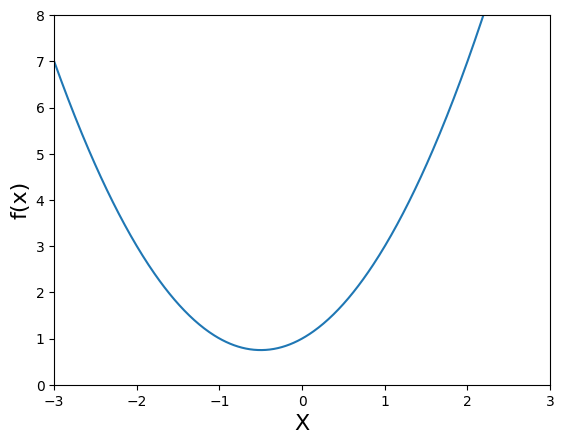

In [6]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [7]:
def df(x):
    return 2 * x + 1

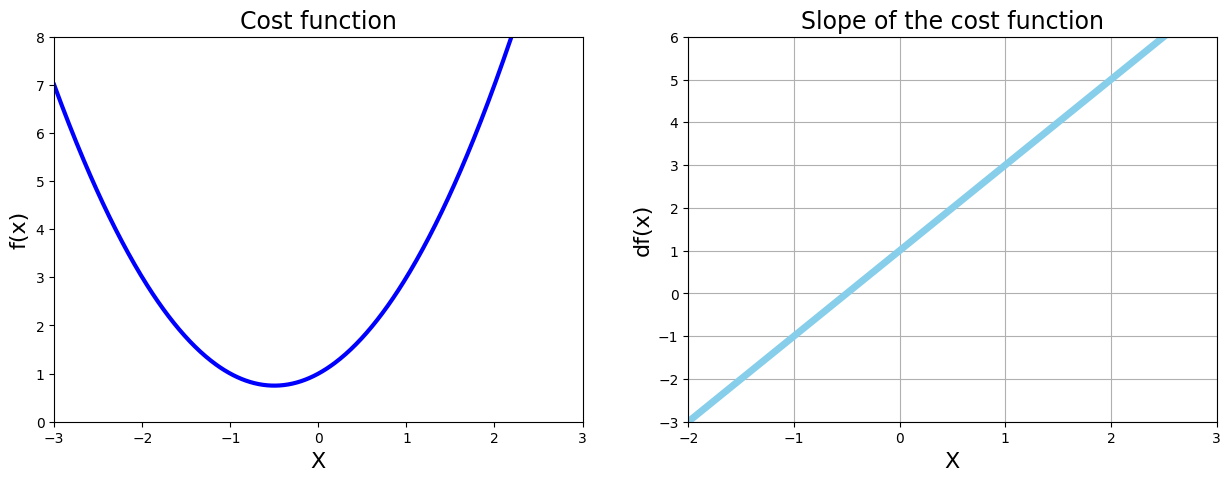

In [8]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [9]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x) # [REQUIRED]
    new_x = previous_x - step_multiplier*gradient ## [REQUIRED]

    step_size = abs(new_x - previous_x)
    print(step_size)

    x_list.append(new_x)
    slope_list.append(gradient)

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

0.7000000000000002
0.56
0.44799999999999995
0.35840000000000005
0.28672
0.22937600000000002
0.18350079999999996
0.14680063999999998
0.11744051199999997
0.09395240959999998
0.07516192767999996
0.06012954214399996
0.04810363371519999
0.03848290697216
0.03078632557772798
0.024629060462182384
0.019703248369745907
0.015762598695796715
0.012610078956637405
0.010088063165309913
0.00807045053224792
0.006456360425798335
0.005165088340638668
0.0041320706725109235
0.003305656538008739
0.0026445252304070355
0.002115620184325595
0.001692496147460476
0.001353996917968392
0.0010831975343746914
0.0008665580274997975
0.0006932464219998047
0.000554597137599866
0.00044367771007985946
0.00035494216806392087
0.0002839537344511145
0.0002271629875609249
0.00018173039004870661
0.0001453843120389764
0.00011630744963120332
9.304595970494045e-05
7.443676776397457e-05
5.954941421115745e-05
4.763953136893706e-05
3.811162509514965e-05
3.0489300076097514e-05
2.4391440060889114e-05
1.9513152048733495e-05
1.5610521638

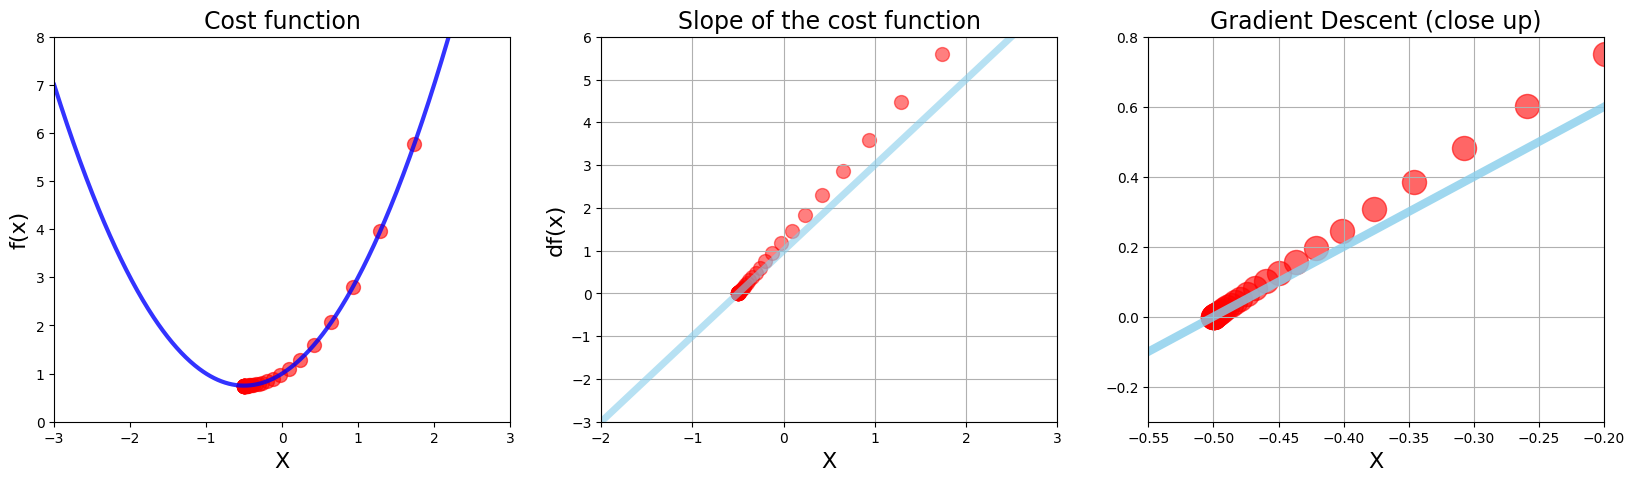

In [10]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return pow(x,4)-4*(x**2)+5## [REQUIRED]

def dg(x):
    return 3*pow(x,3)-8*x## [REQUIRED]

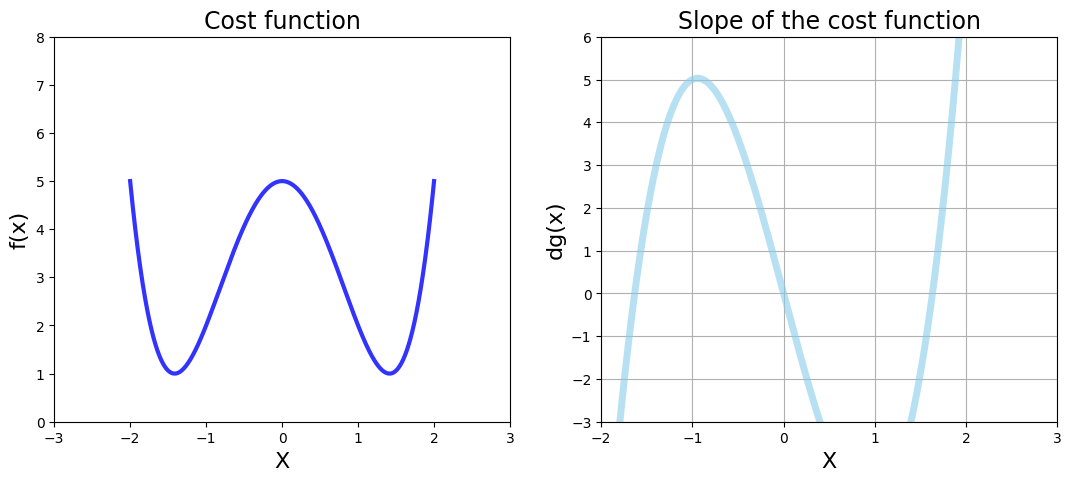

In [12]:
## TASK-3 : Plot function and derivative side by side like has been done earlier

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)


# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)



## Gradient Descent

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.631401778957684
Number of steps: 25


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.632551238790832
Number of steps: 59


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.6313405626093815
Number of steps: 36


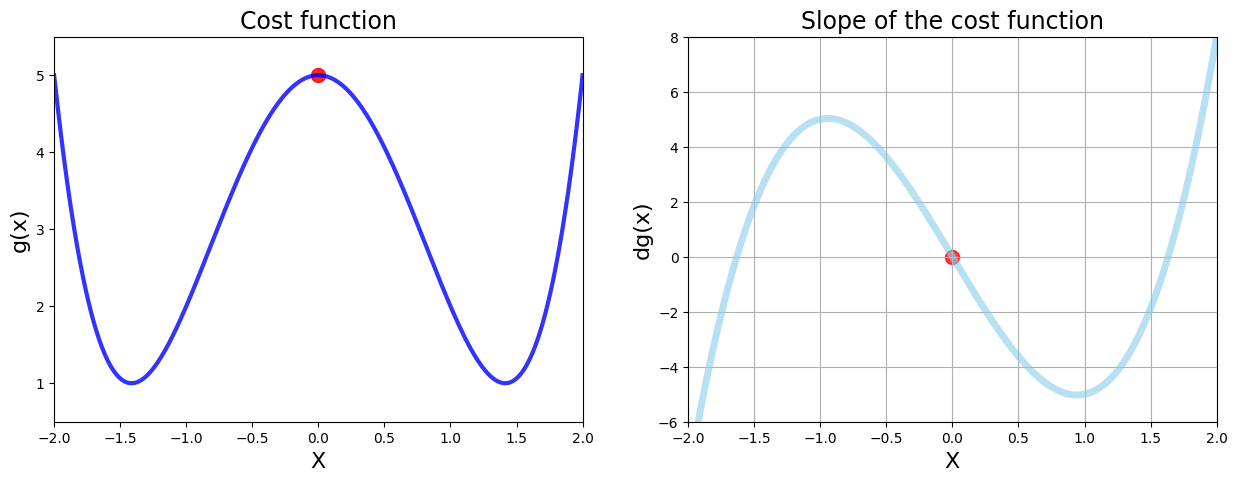

In [17]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

In [42]:
## TASK-4 : Code the same things as they were done for the first two examples

x_3 = np.linspace(-2,2,1000)

def h(x):
    return pow(x,5)-2*(x**4)+2

def dh(x):
    return 5*pow(x,4)-8*(x**3)

def gradient_descent(derivative_func , initial_guess , multiplier , precision, max_iter) :

    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    precision = 0.00001

    for i in range(max_iter) :
      previous_x= new_x
      gradient = derivative_func(previous_x)
      new_x = previous_x - multiplier*gradient

      step_size = abs(new_x - previous_x)
      x_list.append(new_x)
      slope_list.append(derivative_func(new_x))

      if step_size < precision :
        break


    return new_x, x_list, slope_list

#### Learning Rate

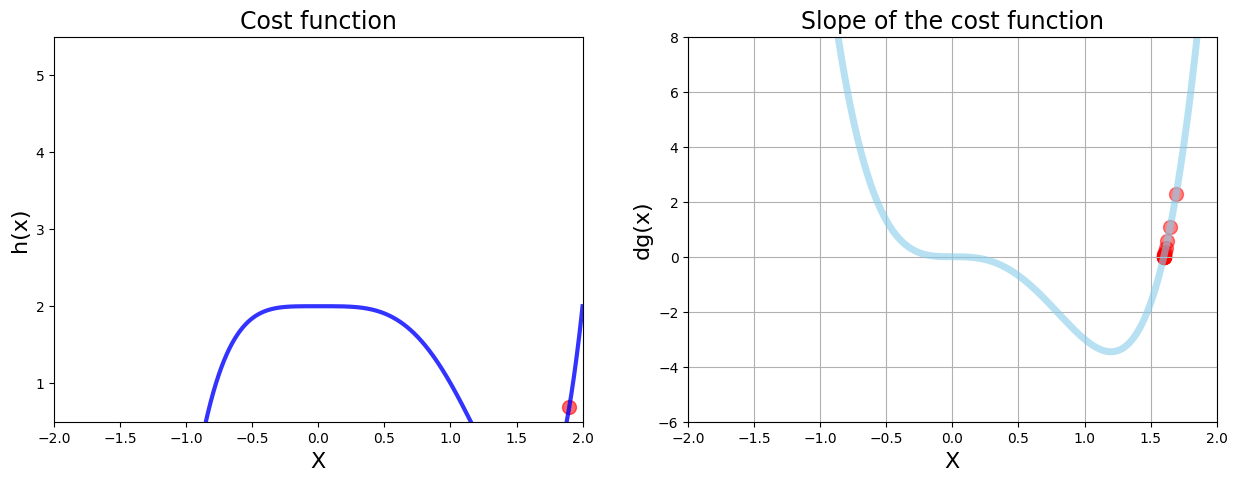

Number of steps is:  19


In [19]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= 1.9,
                                                multiplier=0.02 , precision=0.0001, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

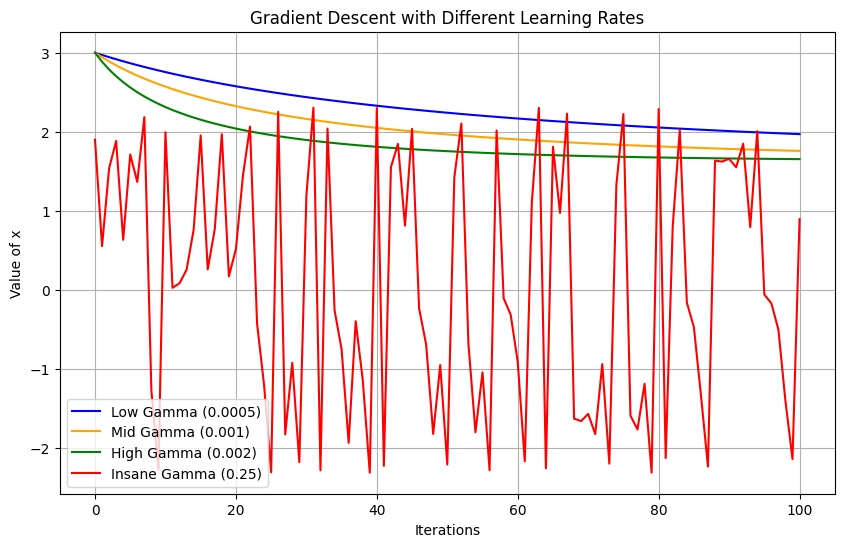

In [44]:
## TASK-5 : Run gradient descent 3 times
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
n = 100
import matplotlib.pyplot as plt

# Assuming gradient_descent function is defined and `dg` is the derivative function
n = 100  # Maximum iterations

# Low learning rate
low_gamma = gradient_descent(dg, initial_guess=3,
                              multiplier=0.0005, precision=0.0001, max_iter=n)

# Mid learning rate
mid_gamma = gradient_descent(dg, initial_guess=3,
                              multiplier=0.001, precision=0.0001, max_iter=n)

# High learning rate
high_gamma = gradient_descent(dg, initial_guess=3,
                               multiplier=0.002, precision=0.0001, max_iter=n)

# Insane learning rate
insane_gamma = gradient_descent(dg, initial_guess=1.9,
                                 multiplier=0.25, precision=0.0001, max_iter=n)


# Plot results
plt.figure(figsize=(10, 6))

# Plot low_gamma
plt.plot(low_gamma[1], label="Low Gamma (0.0005)", color='blue')

# Plot mid_gamma
plt.plot(mid_gamma[1], label="Mid Gamma (0.001)", color='orange')

# Plot high_gamma
plt.plot(high_gamma[1], label="High Gamma (0.002)", color='green')

# Plot insane_gamma
plt.plot(insane_gamma[1], label="Insane Gamma (0.25)", color='red')

plt.xlabel('Iterations')
plt.ylabel('Value of x')
plt.title('Gradient Descent with Different Learning Rates')
plt.legend()
plt.grid()
plt.show()


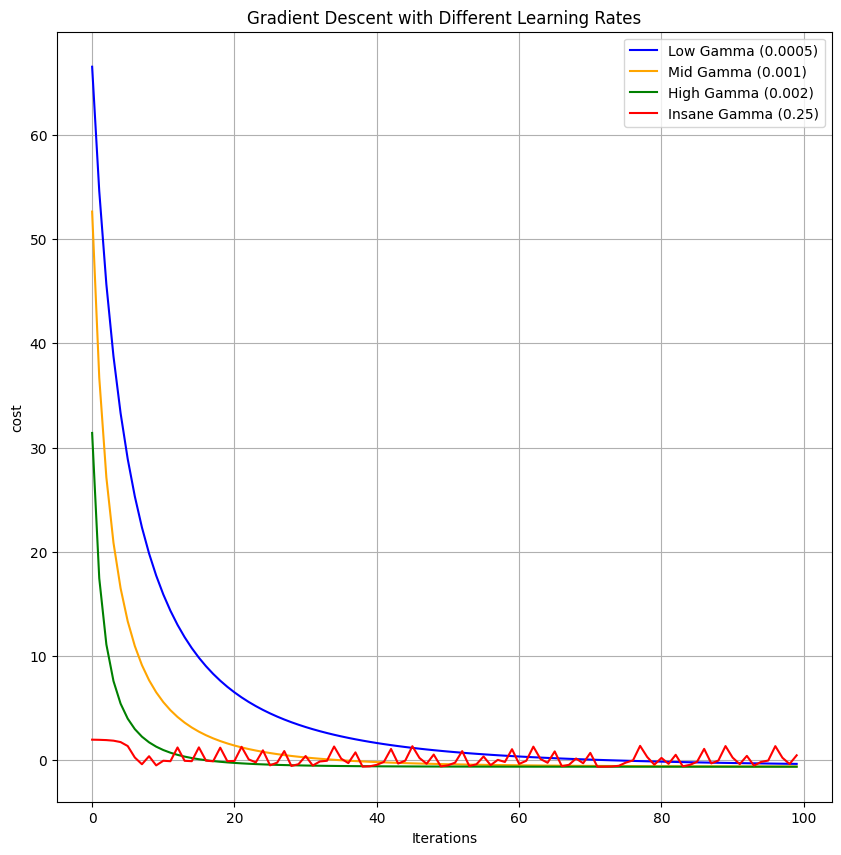

In [48]:
## TASK-7 : Plot reduction in cost for each iteration


def gradient_descent(derivative_func , initial_guess , multiplier , precision, max_iter) :

    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    precision = 0.00001
    cost_list = []

    for i in range(max_iter) :
      previous_x= new_x
      gradient = dh(previous_x)
      new_x = previous_x - multiplier*gradient
      cost_list.append(h(new_x))

      step_size = abs(new_x - previous_x)
      x_list.append(new_x)
      slope_list.append(dh(new_x))

      if step_size < precision :
        break


    return x_list,cost_list


n = 100
import matplotlib.pyplot as plt

# Assuming gradient_descent function is defined and `dg` is the derivative function
n = 100  # Maximum iterations

# Low learning rate
low_gamma,low_gamma_cost = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.0005, precision=0.0001, max_iter=n)

# Mid learning rate
mid_gamma,mid_gamma_cost = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.001, precision=0.0001, max_iter=n)

# High learning rate
high_gamma,high_gamma_cost = gradient_descent(derivative_func=dg, initial_guess=3,
                               multiplier=0.002, precision=0.0001, max_iter=n)

# Insane learning rate
insane_gamma,insane_gamma_cost = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                 multiplier=0.15, precision=0.0001, max_iter=n)

# Plot results
plt.figure(figsize=(10, 10))

# Plot low_gamma
plt.plot(low_gamma_cost, label="Low Gamma (0.0005)", color='blue')

# Plot mid_gamma
plt.plot(mid_gamma_cost, label="Mid Gamma (0.001)", color='orange')

# Plot high_gamma
plt.plot(high_gamma_cost, label="High Gamma (0.002)", color='green')

# Plot insane_gamma
plt.plot(insane_gamma_cost, label="Insane Gamma (0.25)", color='red')

plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Gradient Descent with Different Learning Rates')
plt.legend()
plt.grid()
plt.show()


### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [49]:
## TASK-8 : Code the same things as they were done for the first two examples

def f(x, y):
    return 1/(3**(-x**2 - y**2) + 1)


In [50]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


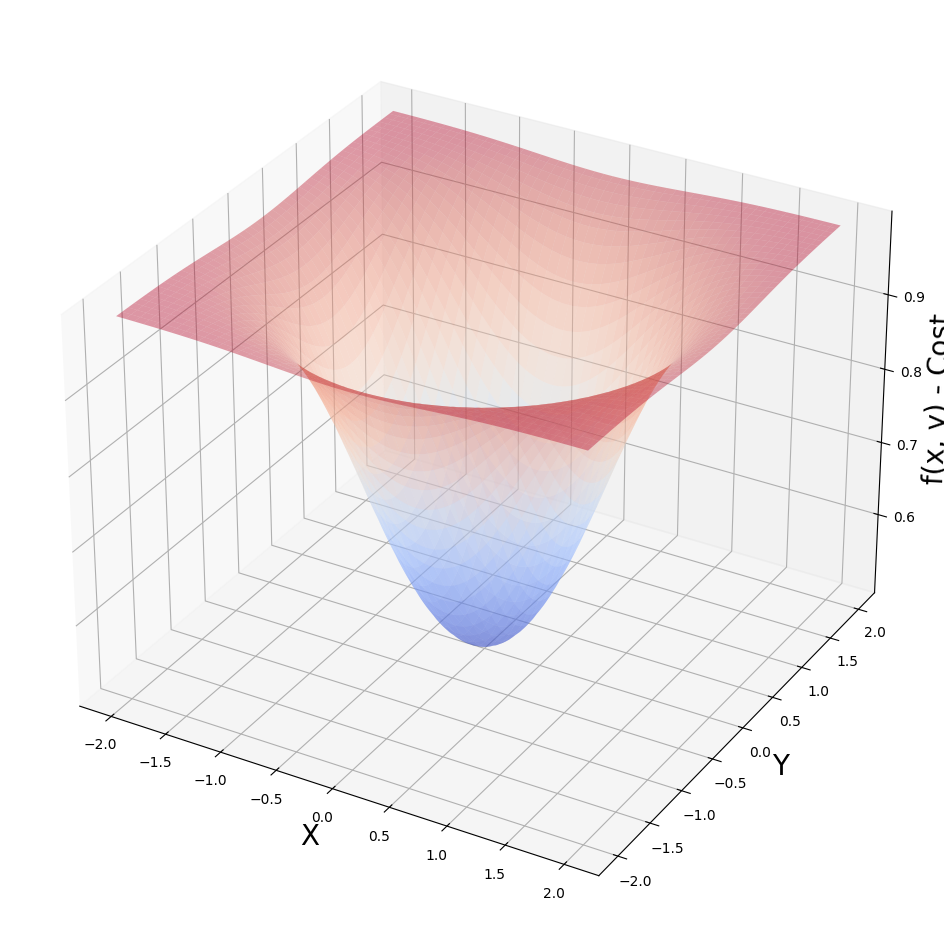

In [53]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
plt.show()

### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = ## [REQUIRED]

#### $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [ ]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

In [ ]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return ## [REQUIRED]

def fpy(x, y):
    return ## [REQUIRED]

In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))



```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

In [ ]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

In [ ]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [ ]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

In [ ]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

In [ ]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [ ]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

In [ ]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [ ]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [ ]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


#### Calc MSE using nested for loops

In [ ]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [ ]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [ ]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [ ]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()